In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [2]:
df1 = pd.read_csv('data/지역별_개폐업_현황(dacon)_김현화.csv', encoding='CP949')
df2 = pd.read_csv('data/상호별_개폐업_현황(dacon)_김현화.csv', encoding='CP949')

In [3]:
df1.info() # 결측값 없음 # 필요 시 위도, 경도 데이터 타입 바꿀 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87855 entries, 0 to 87854
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INDEX               87855 non-null  int64 
 1   DATE                87855 non-null  int64 
 2   INDUTY_NM           87855 non-null  object
 3   BRTC_NM             87855 non-null  object
 4   SIGUNGU_NM          87855 non-null  object
 5   EMD                 87855 non-null  object
 6   LA_DCMLPOINT_VALUE  87855 non-null  object
 7   LO_DCMLPOINT_VALUE  87855 non-null  object
 8   DIVISION            87855 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 6.0+ MB


In [4]:
df2.info() # 업종명, 상호명 결측값 존재 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234232 entries, 0 to 234231
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   No            234232 non-null  int64 
 1   DATE          234232 non-null  int64 
 2   INDUTY_NM     234199 non-null  object
 3   CMPNM         234043 non-null  object
 4   INDUTY_CODEM  234232 non-null  int64 
 5   division      234232 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 10.7+ MB


In [5]:
df1.head() # 업종/지역별 창업·폐업 유추 데이터 

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
0,1,20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
1,2,20200101,노인보호센터,전남,순천시 상사면,오곡리,34.909***,127.461***,1
2,3,20200101,노인생활복지시설,강원,강릉시,용강동,37.754***,128.890***,1
3,4,20200101,돼지국밥,경남,창원시 마산합포구,현동,35.147***,128.557***,1
4,5,20200101,레저용품대여,전북,군산시,비응도동,35.939***,126.529***,1


In [6]:
df2.head() # 업종/상호별 창업·폐업 유추 데이터

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
0,1,20200101,CCTV,(주)실라전자,319013,1
1,2,20200101,가공식품도매(기타),송현동1986발효이야기,452199,1
2,3,20200101,가구판매(종합),더갤러리전주점,571100,1
3,4,20200101,가정부.파출부소개,모두인력파출,839103,1
4,5,20200101,가정부업알선,모두인력파출,839101,1


In [7]:
df1['DATE'].sort_values(ascending=False).head()

87854    20200630
86881    20200630
86905    20200630
86906    20200630
86907    20200630
Name: DATE, dtype: int64

In [8]:
df1['DATE'].sort_values(ascending=True).head()

0     20200101
10    20200101
8     20200101
7     20200101
6     20200101
Name: DATE, dtype: int64

In [9]:
df2['DATE'].sort_values(ascending=False).head()

234231    20200630
232800    20200630
232786    20200630
232787    20200630
232788    20200630
Name: DATE, dtype: int64

In [10]:
df2['DATE'].sort_values(ascending=True).head()

0      20200101
384    20200101
385    20200101
386    20200101
387    20200101
Name: DATE, dtype: int64

#### => 지역별,  상호별 모두 데이터 기간: 2020/01/01 ~ 2020/06/30

In [11]:
# df2 결측치 제거
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234010 entries, 0 to 234231
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   No            234010 non-null  int64 
 1   DATE          234010 non-null  int64 
 2   INDUTY_NM     234010 non-null  object
 3   CMPNM         234010 non-null  object
 4   INDUTY_CODEM  234010 non-null  int64 
 5   division      234010 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 12.5+ MB


In [12]:
# 컬럼명 변경 (INDEX	DATE	INDUTY_NM	BRTC_NM	SIGUNGU_NM	EMD	LA_DCMLPOINT_VALUE	LO_DCMLPOINT_VALUE	DIVISION)
# 인덱스 날짜 업종명 광역시도명 시군구명 읍면동 위도값 경도값 구분
df1.rename(columns = {'DATE': '날짜', 'INDUTY_NM':'업종명', 'BRTC_NM':'광역시도명', 'SIGUNGU_NM':'시군구명', 'EMD':'읍면동',
                   'LA_DCMLPOINT_VALUE':'위도값', 'LO_DCMLPOINT_VALUE':'경도값', 'DIVISION':'구분'}, inplace = True)
# 인덱스 설정
df1 = df1.set_index('날짜')
df1.head()

,INDEX,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
날짜,,,,,,,,
20200101,1,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
20200101,2,노인보호센터,전남,순천시 상사면,오곡리,34.909***,127.461***,1
20200101,3,노인생활복지시설,강원,강릉시,용강동,37.754***,128.890***,1
20200101,4,돼지국밥,경남,창원시 마산합포구,현동,35.147***,128.557***,1
20200101,5,레저용품대여,전북,군산시,비응도동,35.939***,126.529***,1


In [13]:
# INDEX 열 삭제
df1 = df1.drop(['INDEX'], axis=1).copy()
df1.head()

,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
날짜,,,,,,,
20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
20200101,노인보호센터,전남,순천시 상사면,오곡리,34.909***,127.461***,1
20200101,노인생활복지시설,강원,강릉시,용강동,37.754***,128.890***,1
20200101,돼지국밥,경남,창원시 마산합포구,현동,35.147***,128.557***,1
20200101,레저용품대여,전북,군산시,비응도동,35.939***,126.529***,1


In [14]:
# 전국 개폐업 수 확인
df1['구분'].value_counts()

0    85349
1     2506
Name: 구분, dtype: int64

#### => 해당 데이터에서 2020년 상반기 전국 창업기업 수는 2,506, 폐업기업 수는 85349

- 데이터 검증  
- 중소벤처기업부 창업기업동향에 따르면
    - 2020년 상반기 창업기업은 809,599개로 2019년 상반기에 비해 26% 증가 
    - 2020년 (연도로만 구분) 폐업 기업은 894,604개로 2019년(921,299)에 비해 약 3% 감소

    - 창업기업 현황: http://211.253.148.167:8083/statHtml/statHtml.do?orgId=142&tblId=DT_142N_F205&dbUser=nsisupdb  
    - 폐업자 현황: https://kosis.kr/statHtml/statHtml.do?orgId=133&tblId=DT_13301N_9811&vw_cd=MT_ZTITLE&list_id=133_13301_200_90_80&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [15]:
# 서울 데이터만 추출
df1_seoul = df1[df1['광역시도명'].str.contains('서울')]
df1_seoul

,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
날짜,,,,,,,
20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
20200102,산후조리원,서울,서초구,반포동,37.502***,127.010***,0
20200102,소프트웨어개발(기타),서울,관악구,조원[신림8동]동,37.484***,126.903***,0
20200102,철물.건설자재소매(종합),서울,서초구,잠원동,37.514***,127.019***,0
20200103,치과,서울,서초구,서초동,37.496***,127.014***,0
...,...,...,...,...,...,...,...
20200630,화장품.향수,서울,동대문구,용두동,37.573***,127.033***,0
20200630,화장품제조,서울,중구,명동2가,37.562***,126.984***,0
20200630,화학섬유제품제조(종합),서울,강남구,도곡동,37.482***,127.045***,0


In [16]:
# 서울 개폐업 수 확인
df1_seoul['구분'].value_counts()

0    15276
1      677
Name: 구분, dtype: int64

In [17]:
df1_seoul['구분'].value_counts()[1]

677

#### => 해당 데이터에서 2020년 상반기 서울의 창업기업 수는 677, 폐업기업 수는 15276

- 데이터 검증

- 중소벤처기업부 창업기업동향에 따르면
    - 2020년 상반기 서울의 창업기업은 170,115개로 2019년 상반기(128,491)에 비해 약 24% 증가
    - 2020년 (연도로만 구분) 서울의 폐업 기업은 183,115개로 2019년(188,079)에 비해 약 3% 감소

창업기업 현황: http://211.253.148.167:8083/statHtml/statHtml.do?orgId=142&tblId=DT_142N_F205&dbUser=nsisupdb

폐업자 현황: https://kosis.kr/statHtml/statHtml.do?orgId=133&tblId=DT_13301N_9811&vw_cd=MT_ZTITLE&list_id=133_13301_200_90_80&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [18]:
# 해당 데이터 기준 전국 대비 서울 창업기업 수 비율
df1_seoul['구분'].value_counts()[1]/df1['구분'].value_counts()[1] * 100

27.01516360734238

In [19]:
# 중소벤처기업부 창업기업동향 기준 전국 대비 서울 창업기업 수 비율
170115/809599*100

21.012254214740878

=> 표본의 비율이 다름...

In [20]:
# 인덱스 초기화
df1_seoul = df1_seoul.reset_index(drop=False)
df1_seoul

,날짜,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
0,20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
1,20200102,산후조리원,서울,서초구,반포동,37.502***,127.010***,0
2,20200102,소프트웨어개발(기타),서울,관악구,조원[신림8동]동,37.484***,126.903***,0
3,20200102,철물.건설자재소매(종합),서울,서초구,잠원동,37.514***,127.019***,0
4,20200103,치과,서울,서초구,서초동,37.496***,127.014***,0
...,...,...,...,...,...,...,...,...
15948,20200630,화장품.향수,서울,동대문구,용두동,37.573***,127.033***,0
15949,20200630,화장품제조,서울,중구,명동2가,37.562***,126.984***,0
15950,20200630,화학섬유제품제조(종합),서울,강남구,도곡동,37.482***,127.045***,0
15951,20200630,환전소,서울,중구,을지로6가,37.565***,127.006***,0


In [21]:
# 날짜 데이터 타입 변경

# df1_seoul['datetime'] = df1_seoul['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d’)) 
# .apply(lambda x: ~는 내가 x를 다룰건데, 어떻게 할거냐면~ 이라는 뜻 
# 여기서는 %Y%m%d 형식으로 된 x를 pandas의 to_datetime 함수를 통해 datetime object로 변환하는 것
# 만약 원본값이 2015-01-01이라면 format을 %Y-%m-%d로 바꿔주면 됨

df1_seoul['날짜'] = df1_seoul['날짜'].astype('str')
df1_seoul['날짜'] = pd.to_datetime(df1_seoul['날짜'], format='%Y%m%d')

In [22]:
df1_seoul.head()

,날짜,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
0,2020-01-01,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
1,2020-01-02,산후조리원,서울,서초구,반포동,37.502***,127.010***,0
2,2020-01-02,소프트웨어개발(기타),서울,관악구,조원[신림8동]동,37.484***,126.903***,0
3,2020-01-02,철물.건설자재소매(종합),서울,서초구,잠원동,37.514***,127.019***,0
4,2020-01-03,치과,서울,서초구,서초동,37.496***,127.014***,0


In [23]:
df1_month = (df1_seoul.set_index('날짜')
        .groupby('읍면동')
        .resample('m')['구분']
        .sum()
        .unstack(fill_value=0))
df1_month.head()

날짜,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
읍면동,,,,,,
가락1동,0,0,0,0,0,0
가락2동,0,0,0,0,0,0
가락동,0,0,1,0,2,1
가락본동,0,0,0,0,0,0
가리봉1동,0,0,0,0,0,0


In [24]:
# '합계' 컬럼 추가
df1_month['합계'] = df1_month.sum(axis=1)
df1_month.head()

날짜,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,합계
읍면동,,,,,,,
가락1동,0,0,0,0,0,0,0
가락2동,0,0,0,0,0,0,0
가락동,0,0,1,0,2,1,4
가락본동,0,0,0,0,0,0,0
가리봉1동,0,0,0,0,0,0,0


#### ?  컬럼 추가했는데 왜 날짜 뒤에  00:00:00	생기는지 모르겠음

In [25]:
df1_month_top10 = df1_month.sort_values(by='합계', ascending=False).head(10)
df1_month_top10

날짜,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,합계
읍면동,,,,,,,
수서동,0,0,294,1,5,0,300
염곡동,0,0,0,0,17,0,17
상계동,0,0,0,2,7,1,10
역삼동,0,3,0,0,6,0,9
서초동,3,0,1,1,4,0,9
논현동,0,2,1,0,4,0,7
반포동,0,0,1,0,5,0,6
구로동,1,0,0,1,4,0,6
미아동,1,0,1,0,3,0,5


#### => 2020년 상반기 창업기업 수 기준 상위 10개 동
수서동(강남)>염곡동(서초)>상계동(노원)>역삼동(강남)>서초동(서초)>논현동(강남)>반포동(서초)>구로동(구로)>미아동(강북)>삼성동(강남)  
수서동 300개 수상함

In [26]:
# 수서동 데이터만 추출
df1_suseo = df1_seoul[df1_seoul['읍면동']=='수서동']
df1_suseo.head()

,날짜,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
171,2020-03-13,상품권판매,서울,강남구,수서동,37.488***,127.102***,1
172,2020-03-13,상품권판매,서울,강남구,수서동,37.488***,127.102***,1
173,2020-03-13,상품권판매,서울,강남구,수서동,37.488***,127.102***,1
174,2020-03-13,상품권판매,서울,강남구,수서동,37.488***,127.102***,1
175,2020-03-13,상품권판매,서울,강남구,수서동,37.488***,127.102***,1


#### => 같은 날짜에 같은 업종, 위도, 경도로 값이 중복되어 있음

In [27]:
# 중복값 확인
df1_seoul.duplicated(['날짜', '업종명', '위도값', '경도값'])

0        False
1        False
2        False
3        False
4        False
         ...  
15948     True
15949    False
15950    False
15951    False
15952     True
Length: 15953, dtype: bool

In [28]:
# 전체 데이터 다시 확인
df1.head()

,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
날짜,,,,,,,
20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
20200101,노인보호센터,전남,순천시 상사면,오곡리,34.909***,127.461***,1
20200101,노인생활복지시설,강원,강릉시,용강동,37.754***,128.890***,1
20200101,돼지국밥,경남,창원시 마산합포구,현동,35.147***,128.557***,1
20200101,레저용품대여,전북,군산시,비응도동,35.939***,126.529***,1


In [29]:
# 인덱스 초기화
df1 = df1.reset_index(drop=False)
# 중복값 제거
df1= df1.drop_duplicates(['날짜', '업종명', '읍면동', '위도값', '경도값'])

In [30]:
# 중복값 제거 후 전국 개폐업 수 확인
df1['구분'].value_counts()
# 개업 수  2506 -> 2009로 감소
# 폐업 수 85349 -> 75538로 감소

0    75693
1     2009
Name: 구분, dtype: int64

In [31]:
# 중복값 제거 후 df1_seoul 재정의
df1_seoul = df1[df1['광역시도명'].str.contains('서울')]

In [32]:
# 중복값 제거 후 서울 개폐업 수 확인
df1_seoul['구분'].value_counts()
# 개업 수 677 -> 341로 감소
# 폐업 수 15276 -> 11970으로 감소

0    12046
1      341
Name: 구분, dtype: int64

In [33]:
# 해당 데이터 기준 전국 대비 서울 창업기업 수 비율
df1_seoul['구분'].sum()/df1['구분'].sum() * 100

16.973618715778997

In [34]:
df1_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12387 entries, 0 to 87840
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      12387 non-null  int64 
 1   업종명     12387 non-null  object
 2   광역시도명   12387 non-null  object
 3   시군구명    12387 non-null  object
 4   읍면동     12387 non-null  object
 5   위도값     12387 non-null  object
 6   경도값     12387 non-null  object
 7   구분      12387 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 871.0+ KB


In [35]:
# 날짜 데이터타입 다시 변경
df1_seoul['날짜'] = df1_seoul['날짜'].astype('str')
df1_seoul['날짜'] = pd.to_datetime(df1_seoul['날짜'], format='%Y%m%d')

df1_seoul.head()

<ipython-input-35-78106fc085f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_seoul['날짜'] = df1_seoul['날짜'].astype('str')
<ipython-input-35-78106fc085f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_seoul['날짜'] = pd.to_datetime(df1_seoul['날짜'], format='%Y%m%d')


,날짜,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
0,2020-01-01,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
14,2020-01-02,산후조리원,서울,서초구,반포동,37.502***,127.010***,0
16,2020-01-02,소프트웨어개발(기타),서울,관악구,조원[신림8동]동,37.484***,126.903***,0
23,2020-01-02,철물.건설자재소매(종합),서울,서초구,잠원동,37.514***,127.019***,0
27,2020-01-03,치과,서울,서초구,서초동,37.496***,127.014***,0


### 1. 개업 수 기준 상위 10개 동 

In [36]:
# 읍면동 기준으로 그루핑
df1_dong = df1_seoul.groupby(df1_seoul['읍면동']).sum()
df1_dong.head()

,구분
읍면동,
가락1동,0
가락2동,0
가락동,4
가락본동,0
가리봉1동,0


In [37]:
# 내림차순 정렬
df1_dong_top10 = df1_dong.sort_values(by='구분', ascending=False).head(10)
df1_dong_top10 

,구분
읍면동,
서초동,9
역삼동,8
논현동,7
구로동,6
상계동,6
천호동,5
잠원동,5
미아동,5
화곡동,5


In [38]:
# 차트 크기 설정
plt.rcParams["figure.figsize"] = (8, 4)
# 폰트 크기 설정
plt.rcParams["font.size"] = 10

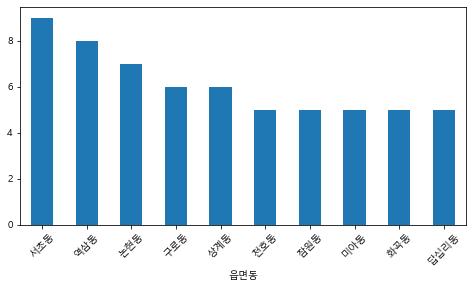

In [39]:
df1_dong_top10['구분'].plot(kind='bar', rot=45)
plt.show()

### 2. 개업 수 기준 상위 10개 구

In [40]:
# 시군구명 기준으로 그루핑
df1_gu = df1_seoul.groupby(df1_seoul['시군구명']).sum()
df1_gu.head()

,구분
시군구명,
강남구,37
강동구,14
강북구,9
강서구,20
관악구,15


In [41]:
# 내림차순 정렬
df1_gu_top10 = df1_gu.sort_values(by='구분', ascending=False).head(10)
df1_gu_top10 

,구분
시군구명,
강남구,37
서초구,31
중구,21
강서구,20
영등포구,18
구로구,16
관악구,15
노원구,15
동대문구,15


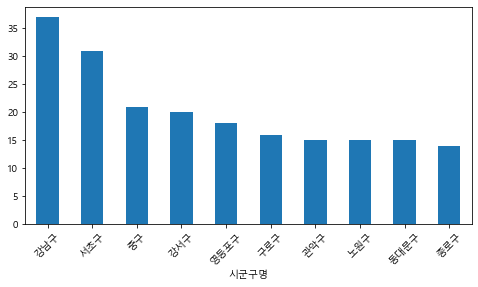

In [42]:
df1_gu_top10['구분'].plot(kind='bar', rot=45)
plt.show()

### 3. 개업 상위 5개 업종

In [43]:
# 개업(구분=1) 데이터만 추출
seoul_start = df1_seoul[df1_seoul['구분']==1]
seoul_start

,날짜,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
0,2020-01-01,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
40,2020-01-04,인터넷쇼핑-의류,서울,중구,흥인동,37.566***,127.016***,1
48,2020-01-05,무선통신업(기타),서울,구로구,구로동,37.498***,126.886***,1
50,2020-01-05,보일러수리,서울,광진구,중곡동,37.567***,127.085***,1
71,2020-01-08,경영상담(종합),서울,영등포구,당산동3가,37.528***,126.894***,1
...,...,...,...,...,...,...,...,...
83487,2020-06-24,제약업(기타),서울,동작구,사당동,37.489***,126.981***,1
83493,2020-06-24,행사대행,서울,동대문구,장안동,37.562***,127.062***,1
84008,2020-06-25,인테리어,서울,동대문구,회기동,37.589***,127.054***,1
85948,2020-06-27,인터넷쇼핑-의류,서울,중구,광희동2가,37.563***,127.007***,1


In [44]:
# 개업 상위 5개 업종 확인
df1_category = seoul_start['업종명'].value_counts().head().to_frame()
df1_category

,업종명
내과,23
부동산,22
초등학교,18
고등학교,14
정형외과,14


In [45]:
print(seoul_start['업종명'].unique().shape)

(166,)


In [46]:
category_sum = seoul_start['업종명'].unique().shape[0]
category_sum

166

In [47]:
# '기타' 행 추가
df1_category.loc['기타'] = category_sum - df1_category['업종명'].sum()
df1_category

,업종명
내과,23
부동산,22
초등학교,18
고등학교,14
정형외과,14
기타,75


In [48]:
ratio_category = []

for i in df1_category['업종명']:
    ratio_category.append(i/category_sum*100)

print(ratio_category)

[13.855421686746988, 13.253012048192772, 10.843373493975903, 8.433734939759036, 8.433734939759036, 45.18072289156627]


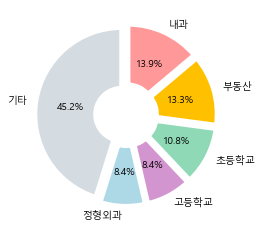

In [49]:
labels_category = df1_category.index.tolist() # 인덱스 리스트로 추출

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio_category, labels=labels_category, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### => 생활밀접업종이 아닌 업종이 상위 5개 항목을 차지
특히 초등학교, 고등학교는 수치가 좀 이상해 보인다.

참고) 부동산업은 연 2,000만원 이하 주택임대소득 과세를 위해 사업자등록이 의무화(20.1월)됨에 따라 신규 사업자등록이 급증한 요인이 작용한 것으로 보인다. https://www.korea.kr/news/pressReleaseView.do?newsId=156438078  '코로나19에도 신규 창업은 역대 최대치 달성'

생활밀접업종: 사업체수가 많고, 종사자수가 5인 미만인 소규모 사업체 비중이 높으며, 창업 등 진출입이 용이한 업종
https://golmok.seoul.go.kr/introduce2.do

### 4. 폐업 수 기준 상위 10개 동

In [50]:
# 폐업(구분=0) 데이터만 추출
seoul_close = df1_seoul[df1_seoul['구분']==0]
seoul_close

,날짜,업종명,광역시도명,시군구명,읍면동,위도값,경도값,구분
14,2020-01-02,산후조리원,서울,서초구,반포동,37.502***,127.010***,0
16,2020-01-02,소프트웨어개발(기타),서울,관악구,조원[신림8동]동,37.484***,126.903***,0
23,2020-01-02,철물.건설자재소매(종합),서울,서초구,잠원동,37.514***,127.019***,0
27,2020-01-03,치과,서울,서초구,서초동,37.496***,127.014***,0
28,2020-01-03,카페,서울,마포구,상암동,37.580***,126.889***,0
...,...,...,...,...,...,...,...,...
87821,2020-06-30,화장품.향수,서울,동대문구,용두동,37.573***,127.033***,0
87822,2020-06-30,화장품.향수,서울,광진구,광장동,37.542***,127.096***,0
87828,2020-06-30,화장품제조,서울,중구,명동2가,37.562***,126.984***,0
87833,2020-06-30,화학섬유제품제조(종합),서울,강남구,도곡동,37.482***,127.045***,0


In [51]:
# 읍면동 기준으로 그루핑
df1_dong2 = seoul_close.groupby(seoul_close['읍면동']).count()
df1_dong2['구분'].head().to_frame()

,구분
읍면동,
가락1동,11
가락2동,7
가락동,60
가락본동,16
가리봉1동,6


In [52]:
# 내림차순 정렬
df1_dong2_top10 = df1_dong2.sort_values(by='구분', ascending=False).head(10)
df1_dong2_top10['구분'].head(10).to_frame() 

,구분
읍면동,
서초동,285
가산동,229
역삼동,226
여의도동,201
신사동,198
구로동,176
논현동,168
삼성동,138
양재동,135


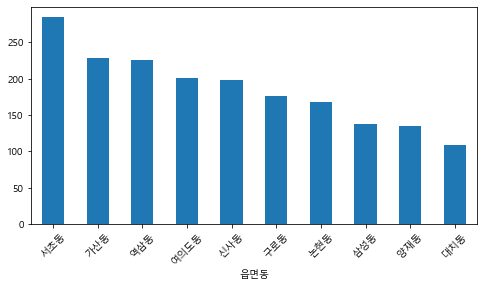

In [53]:
df1_dong2_top10['구분'].plot(kind='bar', rot=45)
plt.show()

In [54]:
# 개업 수 기준 상위 10개 동
df1_dong_top10.index.tolist()

['서초동', '역삼동', '논현동', '구로동', '상계동', '천호동', '잠원동', '미아동', '화곡동', '답십리동']

#### => 서초동, 역삼동, 논현동, 구로동은 개업 및 폐업 상위 10개 동 양쪽에 모두 속함 

### 5. 폐업 수 기준 상위 10개 구

In [55]:
# 시군구명 기준으로 그루핑
df1_gu2 = seoul_close.groupby(seoul_close['시군구명']).count()
df1_gu2['구분'].head().to_frame()

,구분
시군구명,
강남구,1443
강동구,386
강북구,223
강서구,482
관악구,304


In [56]:
# 내림차순 정렬
df1_gu2_top10 = df1_gu2.sort_values(by='구분', ascending=False).head(10)
df1_gu2_top10['구분'].head(10).to_frame() 

,구분
시군구명,
강남구,1443
서초구,990
중구,886
영등포구,779
종로구,707
송파구,622
마포구,601
강서구,482
구로구,472


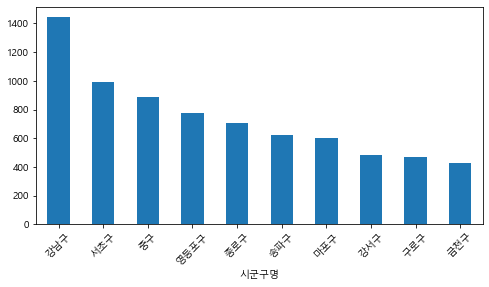

In [57]:
df1_gu2_top10['구분'].plot(kind='bar', rot=45)
plt.show()

In [58]:
# 개업 수 기준 상위10개 구
df1_gu_top10.index.tolist()

['강남구', '서초구', '중구', '강서구', '영등포구', '구로구', '관악구', '노원구', '동대문구', '종로구']

#### => 강남구, 서초구, 중구, 영등포구, 강서구, 구로구, 종로구는 개업 및 폐업 상위 10개 구 양쪽에 모두 속함

### 6. 폐업 상위 5개 업종

In [59]:
# 폐업 상위 5개 업종 확인
df1_category2 = seoul_close['업종명'].value_counts().head().to_frame()
df1_category2

,업종명
부동산,479
한식,305
무역업(종합),292
카페,155
여행사,152


In [60]:
print(seoul_close['업종명'].unique().shape)

(1724,)


In [61]:
category_sum2 = seoul_close['업종명'].unique().shape[0]
category_sum2

1724

In [62]:
# '기타' 행 추가
df1_category2.loc['기타'] = category_sum2 - df1_category2['업종명'].sum()
df1_category2

,업종명
부동산,479
한식,305
무역업(종합),292
카페,155
여행사,152
기타,341


In [63]:
ratio_category2 = []

for i in df1_category2['업종명']:
    ratio_category2.append(i/category_sum2*100)

print(ratio_category2)

[27.784222737819025, 17.691415313225058, 16.937354988399072, 8.990719257540604, 8.816705336426914, 19.779582366589327]


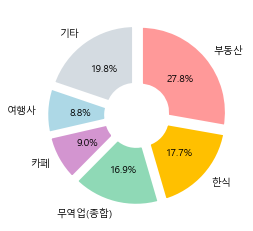

In [64]:
labels_category2 = df1_category2.index.tolist() # 인덱스 리스트로 추출

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio_category2, labels=labels_category2, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### -> 폐업 상위 5개 업종은 대부분 코로나로 인한 타격이 큰 업종으로 파악됨 (부동산 제외)

※ 생각해 볼 문제  
- 0. 해당 데이터 활용 여부 => 데이터 분석 결과 신뢰성이 낮아 폐기하기로 결정함
- 1. 상호별 데이터 활용 방안 => X
- 2. 서울시가 아닌 전국 데이터 분석 필요 여부 => KOSIS 데이터로 별도 분석 예정